## Importamos Librerias

In [89]:
import pandas as pd
import numpy as np
import pylab as plt
plt.rcParams['figure.figsize']=(15, 8)

from scipy.stats import bernoulli, beta   

import matplotlib.pyplot as plt

from bayes import *

## Creamos el dataframe de control

In [90]:
tiempo = [1.10, 2.18,3, 1.53, 2.30, 0.55, 1.21, 0.56, 1.09, 1, 1.15, 3.40, 2.37, 3.12, 2.03, 2.00, 1.10, 2.26, 1.43, 2.44, 2.04]

clicks = [17, 17, 16, 18, 21, 12, 13, 10, 12, 12, 13, 15, 13, 13, 17, 18, 12, 14, 15, 12, 13]

perro = [True, False, True, True, False, True, False, True, True, True, False, True, True, False, True, False, False, True, False, True, False]

Scrollhome = [False, False, True, True, True, False, False, False, True, False, True, False, True, True, False, True, False, False, False, False, False]

ScrollOferta = [True, True, True, True, False, False, False, False, False, True, False, True, True, True, True, True, False, True, True, True, True]


datos = {'Tiempo': tiempo, 'Nº_clicks': clicks, 'Boton(T)/Buscador(F)': perro, 'Scroll_inicial': Scrollhome, 'Scroll_oferta': ScrollOferta}

perros_control = pd.DataFrame(datos)

perros_control['id'] = range(len(perros_control))

In [91]:
perros_control

,Tiempo,Nº_clicks,Boton(T)/Buscador(F),Scroll_inicial,Scroll_oferta,id
0,1.10,17,True,False,True,0
1,2.18,17,False,False,True,1
2,3.00,16,True,True,True,2
3,1.53,18,True,True,True,3
4,2.30,21,False,True,False,4
5,0.55,12,True,False,False,5
6,1.21,13,False,False,False,6
7,0.56,10,True,False,False,7
8,1.09,12,True,True,False,8
9,1.00,12,True,False,True,9


## Gráficamos los que van directamente al buscador y los que van al botón

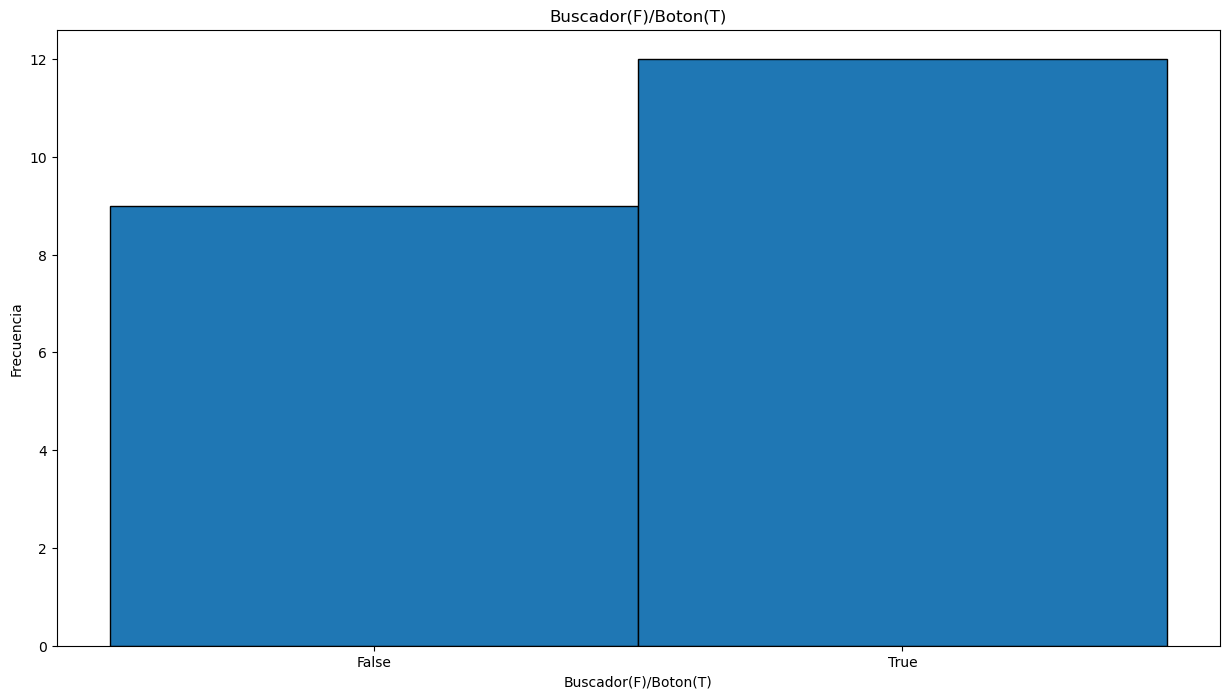

In [94]:
perros_control['Boton(T)/Buscador(F)'] = perros_control['Boton(T)/Buscador(F)'].astype(int)


plt.hist(perros_control['Boton(T)/Buscador(F)'], bins=[0, 0.5, 1], edgecolor='black')


plt.xticks([0.25, 0.75], ['False', 'True'])


plt.xlabel('Buscador(F)/Boton(T)')
plt.ylabel('Frecuencia')
plt.title('Buscador(F)/Boton(T)')

plt.show()




## Gráficamos los que no encuentran la oferta (True no la encuentra)

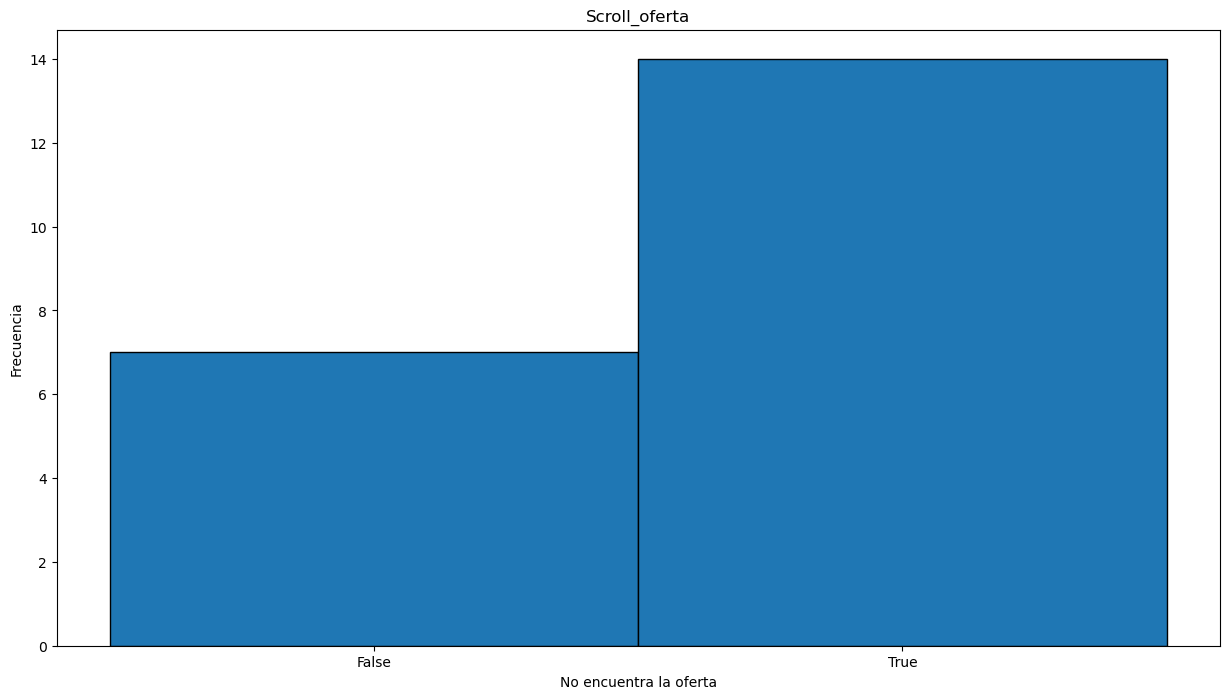

In [95]:
perros_control['Scroll_oferta'] = perros_control['Scroll_oferta'].astype(int)


plt.hist(perros_control['Scroll_oferta'], bins=[0, 0.5, 1], edgecolor='black')


plt.xticks([0.25, 0.75], ['False', 'True'])


plt.xlabel('No encuentra la oferta')
plt.ylabel('Frecuencia')
plt.title('Scroll_oferta')

plt.show()

## Creamos el dataframe de treatment

In [96]:
tiempot = [3.28, 1.18, 0.42, 0.55, 0.55, 1.02, 0.53, 0.20, 0.46, 1.02, 0.39, 1.20, 1.22, 0.32, 0.46, 0.46, 2.20, 2.03, 1.46, 0.50]

clickst = [18, 11, 12, 13, 11, 15, 11, 10, 10, 10, 9, 10, 11, 6, 7, 13, 18, 16, 19, 12]

perrot = [True, True, True, True, False, False, False, False, True, False, True, False, False, True, False, True, False, False, True, True]

Scrollhomet = [False, False, False, False, True, True, True, True, False, True, False, False, True, False, True, False, True, True, False, True]

ScrollOfertat = [True, True, True, False, True, True, False, False, False, True, True, True, False, False, True, True, True, True, False, True]




In [97]:
len(Scrollhome)

21

In [98]:
datost = {'Tiempo': tiempot, 'Nº_clicks': clickst, 'Boton(T)/Buscador(F)': perrot, 'Scroll_inicial': Scrollhomet, 'Scroll_oferta': ScrollOfertat}

perros_treatment = pd.DataFrame(datost)

perros_treatment['id'] = range(len(perros_treatment))

In [99]:
perros_treatment['version'] = 'treatment'

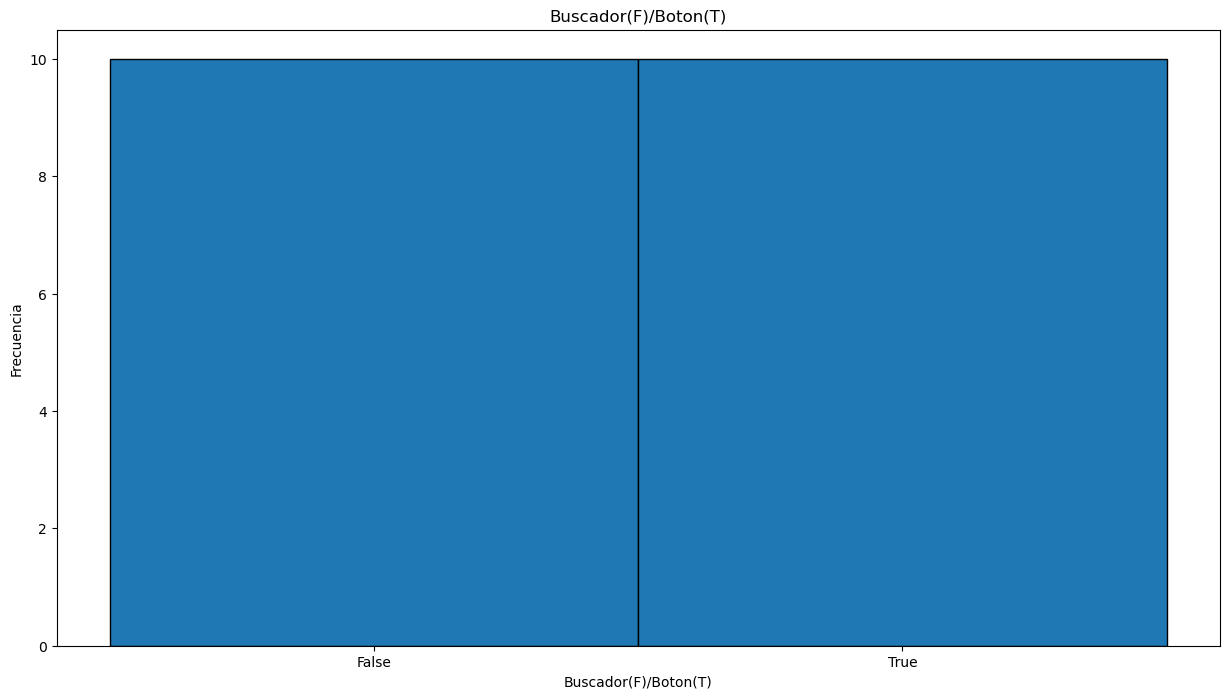

In [100]:
perros_treatment['Boton(T)/Buscador(F)'] = perros_treatment['Boton(T)/Buscador(F)'].astype(int)


plt.hist(perros_treatment['Boton(T)/Buscador(F)'], bins=[0, 0.5, 1], edgecolor='black')


plt.xticks([0.25, 0.75], ['False', 'True'])


plt.xlabel('Buscador(F)/Boton(T)')
plt.ylabel('Frecuencia')
plt.title('Buscador(F)/Boton(T)')

plt.show()

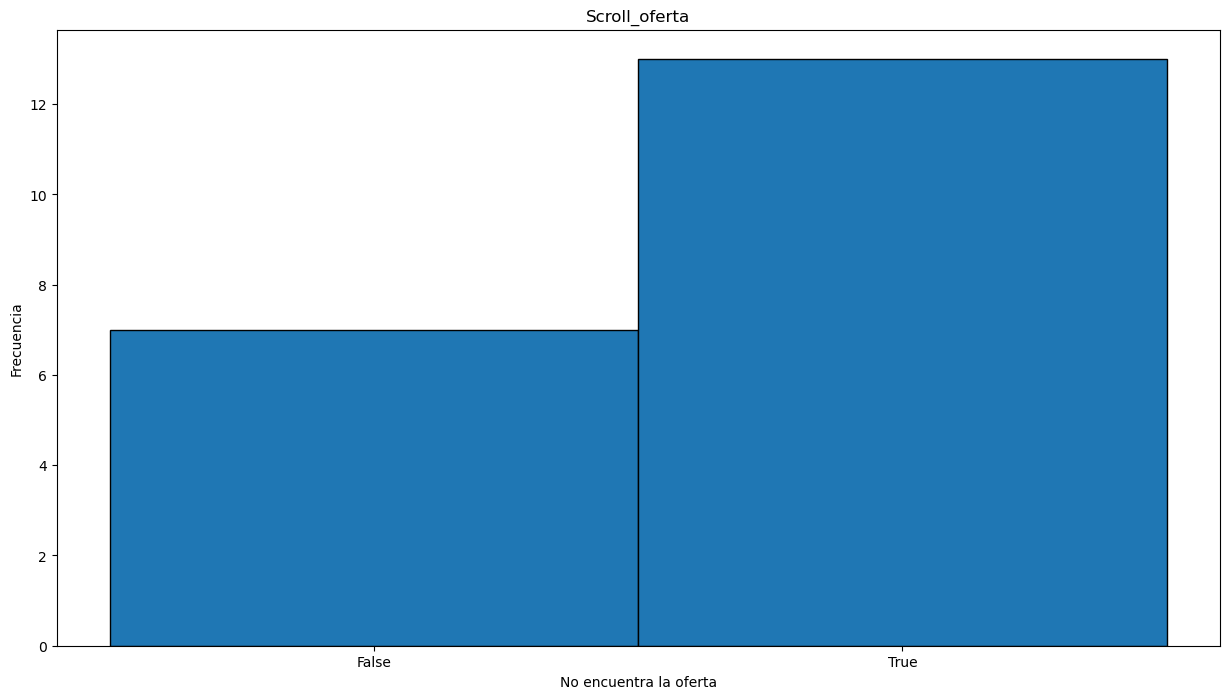

In [101]:
perros_treatment['Scroll_oferta'] = perros_treatment['Scroll_oferta'].astype(int)


plt.hist(perros_treatment['Scroll_oferta'], bins=[0, 0.5, 1], edgecolor='black')


plt.xticks([0.25, 0.75], ['False', 'True'])


plt.xlabel('No encuentra la oferta')
plt.ylabel('Frecuencia')
plt.title('Scroll_oferta')

plt.show()

# Bayes

### Convertimos la columna tiempo y la de n clicks a T/F comparando con la media para fijar el limite 

In [102]:
media_tiempo_control = perros_control.Tiempo.mean()
media_clicks_control = perros_control['Nº_clicks'].mean()

In [103]:
media_tiempo_treatment = perros_treatment.Tiempo.mean()
media_clicks_treatment = perros_treatment['Nº_clicks'].mean()

Sacamos otro df con valores t/f

In [104]:
bayes_control = perros_control
bayes_treatment = perros_treatment

Comparamos cada uno con la media

In [105]:
bayes_control['Tiempo'] = np.where(bayes_control['Tiempo'] > media_tiempo_control, False, True)
bayes_control['Nº_clicks'] = np.where(bayes_control['Nº_clicks'] > media_clicks_control, False, True)


bayes_treatment['Tiempo'] = np.where(bayes_treatment['Tiempo'] > media_tiempo_treatment, False, True)
bayes_treatment['Nº_clicks'] = np.where(bayes_treatment['Nº_clicks'] > media_clicks_treatment, False, True)

In [106]:
bayes_control

,Tiempo,Nº_clicks,Boton(T)/Buscador(F),Scroll_inicial,Scroll_oferta,id,version
0,True,False,1,False,1,0,control
1,False,False,0,False,1,1,control
2,False,False,1,True,1,2,control
3,True,False,1,True,1,3,control
4,False,False,0,True,0,4,control
5,True,True,1,False,0,5,control
6,True,True,0,False,0,6,control
7,True,True,1,False,0,7,control
8,True,True,1,True,0,8,control
9,True,True,1,False,1,9,control


In [107]:
true_control_tiempo = bayes_control.Tiempo.value_counts()[1]
true_treatment_tiempo = bayes_treatment.Tiempo.value_counts()[1]


In [108]:
true_control_clicks = bayes_control['Nº_clicks'].value_counts()[1]
true_treatment_clicks = bayes_treatment['Nº_clicks'].value_counts()[1]

## Empezamos evaluando el Tiempo

In [109]:
# del total la tasa se evalua si superan la media de tiempo o no 

tiempo_control, tiempo_t_control = len(bayes_control.Tiempo), true_control_tiempo  

tiempo_treatment, tiempo_t_treatment = len(bayes_treatment.Tiempo), true_treatment_tiempo


CR_ctrl = tiempo_t_control/tiempo_control
CR_test = tiempo_t_treatment/tiempo_treatment

f'Tasas conversion: Control: {CR_ctrl}, Test: {CR_test}'

'Tasas conversion: Control: 0.47619047619047616, Test: 0.45'

In [110]:
# a prioris

a_C, b_C = 1+tiempo_t_control, 1+tiempo_control-tiempo_t_control

a_T, b_T = 1+tiempo_t_treatment, 1+tiempo_treatment-tiempo_t_treatment

beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

In [111]:
x=np.linspace(0, 1, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

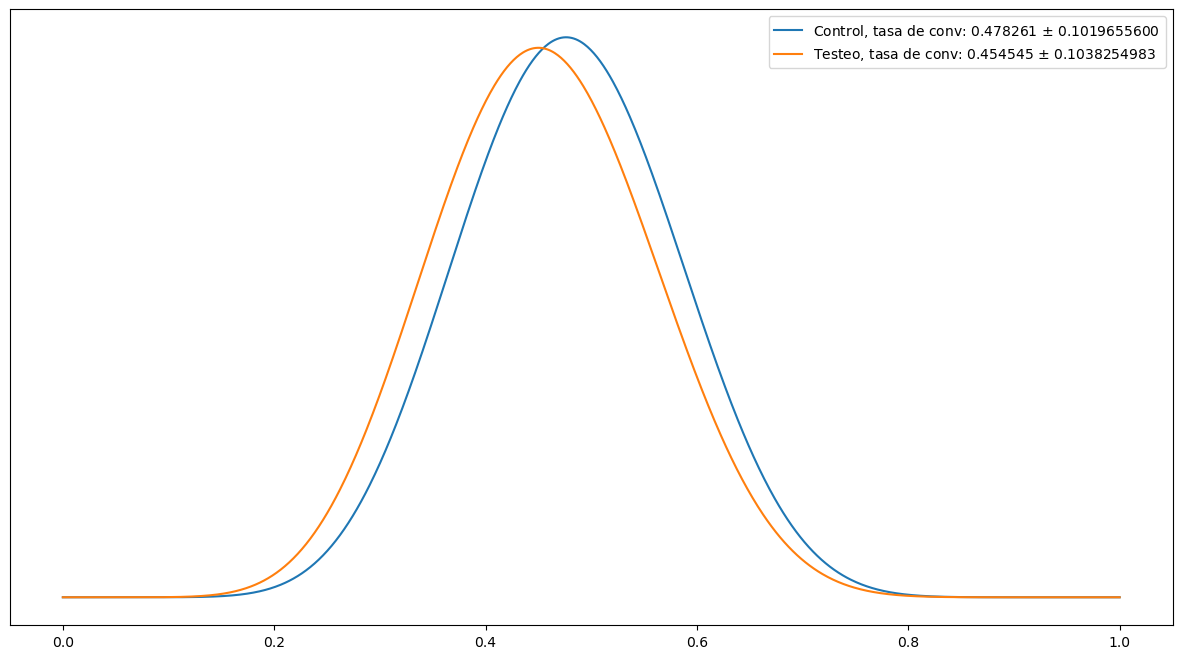

In [112]:
plot([beta_control, beta_test], ['Control', 'Testeo'])

Salto entre las distribuciones

In [113]:
salto = (beta_test.mean() - beta_control.mean())/beta_control.mean()

In [114]:
salto

-0.049586776859504196

Probabilidad de que el treatment esté por enicma del cruce

In [115]:
calc = calc_prob(beta_control, beta_test)

In [116]:
calc

0.5647578915618617

In [117]:
prob = 1 - beta_test.cdf(calc)

In [118]:
'''El test aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)


'El test aumenta la tasa de conversion en un -4.96%, con una probabilidad del 14.96%'

## Evaluamos el número de clicks

In [119]:
# del total la tasa se evalua si superan la media de tiempo o no 

clicks_control, clicks_t_control = len(bayes_control['Nº_clicks']), true_control_clicks  

clicks_treatment, clicks_t_treatment = len(bayes_treatment['Nº_clicks']), true_treatment_clicks


CR_ctrl = true_control_clicks/clicks_control
CR_test = true_treatment_clicks/clicks_treatment

f'Tasas conversion: Control: {CR_ctrl}, Test: {CR_test}'

'Tasas conversion: Control: 0.42857142857142855, Test: 0.35'

In [120]:
# a prioris

a_C, b_C = 1+clicks_t_control, 1+clicks_control-clicks_t_control

a_T, b_T = 1+clicks_t_treatment, 1+clicks_treatment-clicks_t_treatment

beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

In [121]:
x=np.linspace(0, 1, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

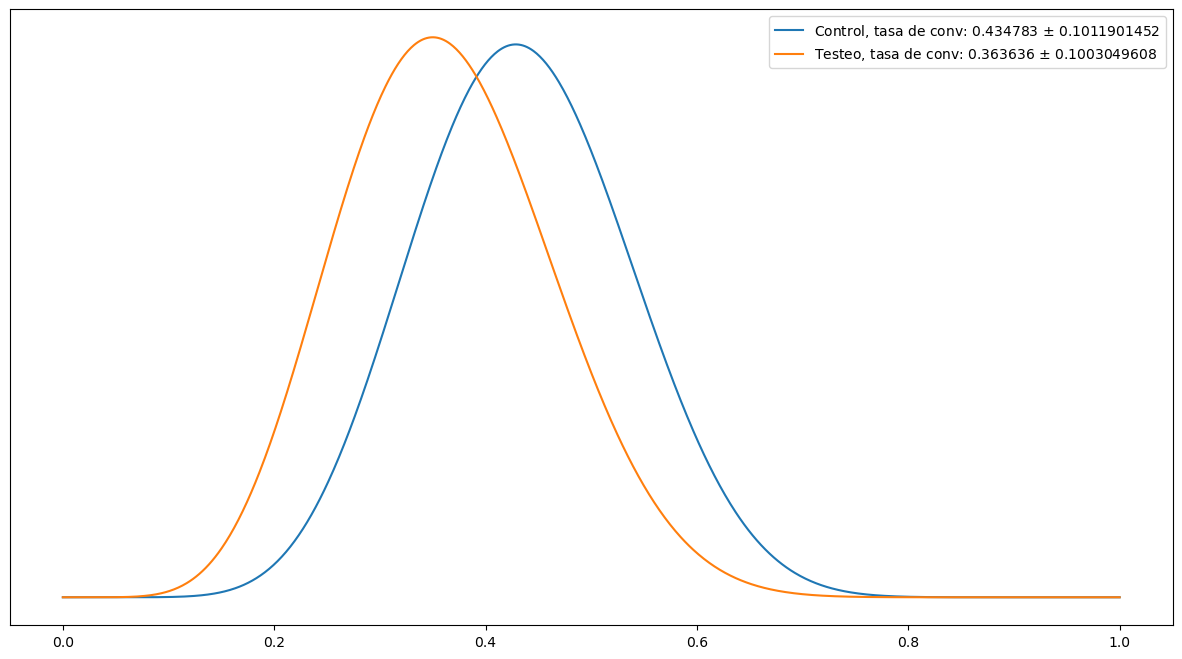

In [122]:
plot([beta_control, beta_test], ['Control', 'Testeo'])

In [123]:
calc = calc_prob(beta_control, beta_test)

In [124]:
calc

0.6911712385851091

In [125]:
prob

0.14957700554119757

In [126]:
salto = (beta_test.mean() - beta_control.mean())/beta_control.mean()
prob = 1 - beta_test.cdf(calc)

'''El test aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test aumenta la tasa de conversion en un -16.36%, con una probabilidad del 0.08%'